In [9]:
#pip install git+https://github.com/hiive/mlrose.git#egg=mlrose-hiive

In [10]:
#pip install git+https://github.com/knakamura13/mlrose-ky/#egg=mlrose-ky

In [11]:
import mlrose_hiive as mh

In [12]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [13]:
import pandas as pd

In [85]:
# Four peak - problem size = 7

In [124]:
problem_ffp_tiny = mh.FlipFlopGenerator().generate(seed=0, size=7)

In [125]:
# SA runner class
# 1. tune tempeature list
sa_ffp_tiny = mh.SARunner(problem=problem_ffp_tiny,
              experiment_name='ffp_sa_tiny',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              temperature_list=[1, 2.0, 5.0],
              decay_list=[mh.ExpDecay])

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = sa_ffp_tiny.run()

In [126]:
df_run_curves_ffp.shape

(96, 6)

In [127]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000569,2.0,0.0,1,2048
1,1,0.007132,1.0,2.0,1,2048
2,2,0.010933,1.0,4.0,1,2048
3,3,0.016883,2.0,6.0,1,2048
4,4,0.017116,2.0,7.0,1,2048


In [128]:
df_run_curves_ffp['Temperature'].value_counts() # what does it say?

5.0    44
2.0    42
1      10
Name: Temperature, dtype: int64

In [129]:
df_run_curves_ffp.shape

(96, 6)

In [130]:
# need to check Time and FEvals

In [131]:
df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
9,9,0.025910,6.0,16.0,1,2048
51,41,0.032391,6.0,73.0,2.0,2048
95,43,0.038733,6.0,81.0,5.0,2048


In [132]:
df_run_curves_ffp.dtypes

Iteration        int64
Time           float64
Fitness        float64
FEvals         float64
Temperature     object
max_iters        int64
dtype: object

In [133]:
df_run_curves_ffp['Temperature'] = df_run_curves_ffp['Temperature'].astype(str).astype(float)

In [134]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [135]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
9,9,0.025910,6.0,16.0,1.0,2048
51,41,0.032391,6.0,73.0,2.0,2048
95,43,0.038733,6.0,81.0,5.0,2048


In [136]:
df_curves_bestfitness_ffp.groupby('Temperature').agg({'FEvals': 'mean', 'Iteration': 'min', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals and less iteration. Pick temp=1

,Temperature,FEvals,Iteration,Time
0,1.0,16.0,9,0.025910
1,2.0,73.0,41,0.032391
2,5.0,81.0,43,0.038733


In [143]:
# SA runner class
# 2. tune decay, compare with the above results of the same temp
sa_geom_ffp_tiny = mh.SARunner(problem=problem_ffp_tiny,
              experiment_name='ffp_sa_small_tiny',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              temperature_list=[1, 2, 5],
              decay_list=[mh.GeomDecay])

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = sa_geom_ffp_tiny.run()

In [144]:
df_run_curves_ffp.shape

(146, 6)

In [145]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000299,2.0,0.0,1,2048
1,1,0.005971,1.0,2.0,1,2048
2,2,0.012031,1.0,4.0,1,2048
3,3,0.017676,2.0,6.0,1,2048
4,4,0.018095,2.0,7.0,1,2048


In [146]:
df_run_curves_ffp['Temperature'].value_counts() # what does it say?

5    94
2    42
1    10
Name: Temperature, dtype: int64

In [147]:
# need to check Time and FEvals

In [148]:
df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
9,9,0.028324,6.0,16.0,1,2048
51,41,0.030803,6.0,73.0,2,2048
145,93,0.036797,6.0,172.0,5,2048


In [149]:
df_run_curves_ffp.dtypes

Iteration        int64
Time           float64
Fitness        float64
FEvals         float64
Temperature     object
max_iters        int64
dtype: object

In [150]:
df_run_curves_ffp['Temperature'] = df_run_curves_ffp['Temperature'].astype(str).astype(float)

In [151]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [152]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
9,9,0.028324,6.0,16.0,1.0,2048
51,41,0.030803,6.0,73.0,2.0,2048
145,93,0.036797,6.0,172.0,5.0,2048


In [153]:
df_curves_bestfitness_ffp.groupby('Temperature').agg({'FEvals': 'mean', 'Iteration': 'min', 'Time': 'min'}).reset_index()
# Temp = 1 is the only option. Exp Decay takes less FEvals and Iteration, pick Exp.

,Temperature,FEvals,Iteration,Time
0,1.0,16.0,9,0.028324
1,2.0,73.0,41,0.030803
2,5.0,172.0,93,0.036797


In [110]:
# tentatively, pick exp decay with initial temp=1, as exp and geometric decay didn't make a difference in this particular set of testing

In [154]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000299,2.0,0.0,1.0,2048
1,1,0.005971,1.0,2.0,1.0,2048
2,2,0.012031,1.0,4.0,1.0,2048
3,3,0.017676,2.0,6.0,1.0,2048
4,4,0.018095,2.0,7.0,1.0,2048


In [155]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [156]:
# SA runner - size = 7
# 3. iterate through 10 seeds
for s in range(10):
    sa_ffp_tiny = mh.SARunner(problem=problem_ffp_tiny,
              experiment_name='ffp_sa_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              temperature_list=[1],
              decay_list=[mh.ExpDecay])

    df_run_stats_ffp, df_run_curves_ffp = sa_ffp_tiny.run()
    # append to the result df
    df_iter_curves_ffp = df_iter_curves_ffp.append(df_run_curves_ffp)

In [157]:
df_iter_curves_ffp.shape

(334, 6)

In [158]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000240,2.0,0.0,1,2048
1,1,0.004769,1.0,2.0,1,2048
2,2,0.008858,1.0,4.0,1,2048
3,3,0.012910,2.0,6.0,1,2048
4,4,0.013046,2.0,7.0,1,2048


In [159]:
df_iter_curves_ffp.Iteration.max()

51

In [160]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [161]:
df_fitness_iter_ffp.shape

(52, 3)

In [162]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == df_iter_curves_ffp.Fitness.max()].Iteration.min()

51

In [163]:
for i in range(51, df_iter_curves_ffp.Iteration.max()+1):
    if df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration >= i].avg_fitness.min() >= df_iter_curves_ffp.Fitness.max() - 1:
        print(i)
        break

51


In [164]:
df_iter_curves_ffp.Fitness.max()

6.0

In [165]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [166]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,2.900000,0.544444,0.737865
1,1,3.400000,1.377778,1.173788
2,2,3.600000,2.711111,1.646545
3,3,3.444444,1.777778,1.333333
4,4,3.666667,1.000000,1.000000


Text(0, 0.5, 'Fitness')

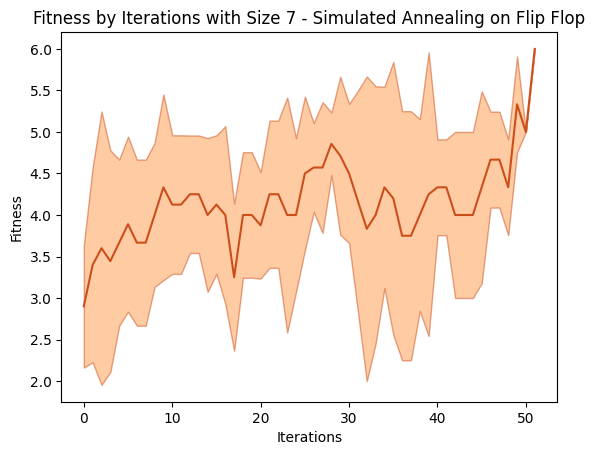

In [167]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#CC4F1B')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.title('Fitness by Iterations with Size 7 - Simulated Annealing on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Fitness')